<a href="https://colab.research.google.com/github/anchaljethliya/Javascript_learning/blob/main/NEURALNETWORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install requests

In [2]:
import requests

h= requests.get('https://www.kaggle.com/crawford/gene-expression/downloads/actual.csv')


In [3]:
d=h.content
csvfile=open('download.csv','wb')
csvfile.write(d)


4832

In [4]:
import requests

In [5]:
url = 'http://google.com/favicon.ico'
r = requests.get(url, allow_redirects=True)
open('google.ico', 'wb').write(r.content)
r = requests.get(url, allow_redirects=True)
print(r.headers.get('content-type'))


image/x-icon


In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt


In [7]:

## Read  dataset from google drive

from google.colab import drive
import pandas as pd

# drive.mount('/content/gdrive', force_remount=True)
# #df=pd.read_csv('/content/drive/MyDrive/diabetes.csv')
# df=pd.read_csv('/content/gdrive/MyDrive/content/diabetes.csv')
#df.info()

#print(df.shape)


In [9]:
##  Read dataset from harddisk

from google.colab import files
uploaded = files.upload()


df = pd.read_csv('diabetes.csv')
df.info()

print(df.shape)   #  size of dataset


#df.describe().transpose()

# df.isnull()

# df.replace(to_replace = np.nan, value = -99)
# df.fillna(0)


df.head()


Saving diabetes.csv to diabetes.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# New Section

#data.head()
#split dataset in features and target variable
#X = data.iloc[:, :-1].values  #  feature Columns
# X = df.iloc[:, 0:1].values
# y1 = df.iloc[:, 2].values

# Split into features (X) and labels (y) using iloc
X = df.iloc[:, :-1]  # Select all rows, and all columns except the last one
y1 = df.iloc[:, -1]   # Select all rows, and only the last column
#
# Split dataset into training set and test set
# New Section

#data.head()
#split dataset in features and target variable
#X = data.iloc[:, :-1].values  #  feature Columns
# X = df.iloc[:, 0:1].values
# y1 = df.iloc[:, 2].values

# Split into features (X) and labels (y) using iloc
X = df.iloc[:, :-1]  # Select all rows, and all columns except the last one
y1 = df.iloc[:, -1]   # Select all rows, and only the last column
#
# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.3, random_state=0)
print(X_train.shape); print(X_test.shape)

# Classification
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.3, random_state=0)
print(X_train.shape); print(X_test.shape)

# Classification
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix


(537, 8)
(231, 8)
(537, 8)
(231, 8)


In [11]:
#  Hidden layers used are 3 and in each layer 8 neurons are present, activation function by default is relu, solver is optimizer used is adam we can choose gradient also
# No. of iterations used are 500.  This hyperparameters can be adjusted
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8,8), activation='relu', solver='adam', max_iter=600)
mlp.fit(X_train,y_train)


predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
#  Performance of training
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

#perforfance of testing
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('Accuracy: %.3f' % accuracy_score(y_test, predict_test))
print('F1 Score: %.3f' % f1_score(y_test, predict_test))
print('Precision: %.3f' % precision_score(y_test, predict_test))
print('Recall: %.3f' % recall_score(y_test, predict_test))




from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


[[298  45]
 [ 68 126]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       343
           1       0.74      0.65      0.69       194

    accuracy                           0.79       537
   macro avg       0.78      0.76      0.77       537
weighted avg       0.79      0.79      0.79       537

[[129  28]
 [ 41  33]]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       157
           1       0.54      0.45      0.49        74

    accuracy                           0.70       231
   macro avg       0.65      0.63      0.64       231
weighted avg       0.69      0.70      0.69       231

Accuracy: 0.701
F1 Score: 0.489
Precision: 0.541
Recall: 0.446


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction for input [[ 1.    85.    66.    29.     0.    26.6    0.451 31.   ]]: 0
[0]
(231, 8)
(231,)
(231,)


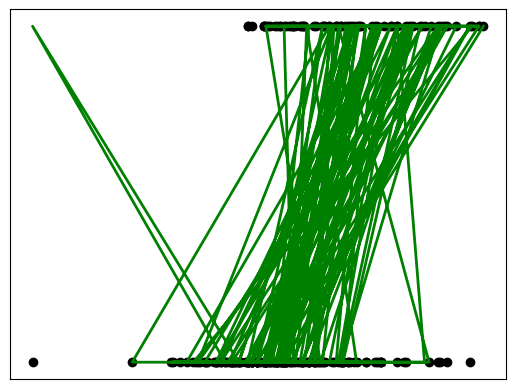

In [14]:
#  Hidden layers used are 3 and in each layer 8 neurons are present, activation function by default is relu, solver is optimizer used is adam we can choose gradient also
# No. of iterations used are 500.  This hyperparameters can be adjusted
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8,8), activation='relu', solver='adam', max_iter=600)
mlp.fit(X_train,y_train)


# Replace with the input value you want to predict, ensuring it has 8 features
#X1_test = np.array([[1,89,66,23,94,28.1, 0.167,21]]) # This is likely the correct format based on the scaler
X1_test = np.array([[1, 85, 66, 29, 0, 26.6, 0.451, 31]])  # Example with 8 features - adjust values accordingly


scaled_input = scaler.transform(X1_test)
prediction = mlp.predict(scaled_input)

print(f"Prediction for input {X1_test}: {prediction[0]}")
print(prediction)


###  Visualize the results of Classification
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np


print(X_test.shape);
print(y_test.shape)
print(predict_test.shape)

#plt.scatter(X_train[:,0], y_train,color='g')
#plt.plot(X_test[:, 0], predict_test,color='k')



# Plot outputs
plt.scatter(X_test[:, 1], y_test,  color='black') #plot scatters
plt.plot(X_test[:, 1], predict_test, color='green', linewidth=2) #plot line



plt.xticks(())
plt.yticks(())

plt.show()


In [15]:
###  MLP for regression
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt


In [16]:
from google.colab import files
uploaded = files.upload()


# df = pd.read_csv('car-price.csv')
# df.info()
#df = pd.read_csv('housing2.csv')
df = pd.read_csv('mobile-price.csv')
df.describe()

df.info()
print(df.shape)

  #  size of dataset
#df.describe().transpose()



df.describe()
#df.head()


Saving mobile-price.csv to mobile-price.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [19]:
###  Label encoding
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Check if 'mainroad' column exists, if not, print available columns and exit
if 'mainroad' not in df.columns:
    print(f"Column 'mainroad' not found. Available columns: {df.columns.tolist()}")
    # You can either exit here or handle the missing column in another way
    # For now, we'll exit to prevent further errors
    # You can remove the following two lines if you have alternative handling
    import sys
    sys.exit(1)

# Encode labels in column 'mainroad' if it exists
df['mainroad']= label_encoder.fit_transform(df['mainroad'])

df['guestroom']= label_encoder.fit_transform(df['guestroom'])

df['basement']= label_encoder.fit_transform(df['basement'])

df['hotwaterheating']= label_encoder.fit_transform(df['hotwaterheating'])

df['airconditioning ']= label_encoder.fit_transform(df['airconditioning'])

df['prefarea']= label_encoder.fit_transform(df['parking'])

df['furnishingstatus']= label_encoder.fit_transform(df['furnishingstatus'])
df['furnishingstatus'].unique()

Column 'mainroad' not found. Available columns: ['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']


SystemExit: 1

/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [20]:
###  Label encoding
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Instead of exiting, handle missing columns gracefully
# You can choose to:
# 1. Drop the rows with missing values
# 2. Impute the missing values with a suitable strategy (e.g., mean, median, mode)
# 3. Create a new category for missing values
# Here, we'll simply skip encoding for the missing columns and print a warning
for column in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']:
    if column in df.columns:
        df[column] = label_encoder.fit_transform(df[column])
    else:
        print(f"Warning: Column '{column}' not found in the DataFrame. Skipping encoding.")

df['furnishingstatus'].unique()

KeyError: 'furnishingstatus'

In [21]:
###  Label encoding
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Instead of exiting, handle missing columns gracefully
# You can choose to:
# 1. Drop the rows with missing values
# 2. Impute the missing values with a suitable strategy (e.g., mean, median, mode)
# 3. Create a new category for missing values
# Here, we'll simply skip encoding for the missing columns and print a warning
for column in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']:
    # Check if the column exists before encoding
    if column in df.columns:
        df[column] = label_encoder.fit_transform(df[column])
    else:
        print(f"Warning: Column '{column}' not found in the DataFrame. Skipping encoding.")


# Print unique values only if the column exists in the DataFrame
if 'furnishingstatus' in df.columns:
    print(df['furnishingstatus'].unique())
else:
    print("Column 'furnishingstatus' not found in the DataFrame.")

Column 'furnishingstatus' not found in the DataFrame.


In [22]:
#data.head()
#split dataset in features and target variable
#X = data.iloc[:, :-1].values  #  feature Columns
X = df.iloc[:, 0:6].values
y = df.iloc[:, 7].values

#
# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape); print(X_test.shape)

# Regression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import classification_report,confusion_matrix

#  Hidden layers used are 3 and in each layer 8 neurons are present, activation function by default is relu, solver is optimizer used is adam we can choose gradient also
# No. of iterations used are 500.  This hyperparameters can be adjusted
mlp = MLPRegressor(hidden_layer_sizes=(8,8,8,), activation='relu', solver='adam', max_iter=200)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

#  Performance of training

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_test, predict_test)
rmse = np.sqrt(mean_squared_error(y_test, predict_test))
r2 = r2_score(y_test, predict_test)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 score:', r2)



(700, 6)
(300, 6)
Mean Squared Error: 417.9975779867301
Root Mean Squared Error: 20.44498906790439
R2 score: -0.2528693277962666


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [23]:
from sklearn.metrics import classification_report,confusion_matrix
# print(confusion_matrix(y_train,predict_train))
# print(classification_report(y_train,predict_train))

# perforfance of testing
#print(confusion_matrix(y_test,predict_test))
#print(classification_report(y_test,predict_test))

# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# print('Accuracy: %.3f' % accuracy_score(y_test, predict_test))
# print('F1 Score: %.3f' % f1_score(y_test, predict_test))
# print('Precision: %.3f' % precision_score(y_test, predict_test))
# print('Recall: %.3f' % recall_score(y_test, predict_test))

# #  target column in dataset  is outcome
# target_column = ['Outcome']

# #  Separating target cplumn from other columns and use as the features
# predictors = list(set(list(df.columns))-set(target_column))

# # Normalize the data wrt  maximum value of each column
# df[predictors] = df[predictors]/df[predictors].max()
# df.describe().transpose()


# X = df[predictors].values    #  Feature Columns
# y = df[target_column].values   # target column


#  test_size is 30% and train is &)%,  Random state=0 means sequential reading records,  randomsttate=1 chooses randomly 30-70% records



# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0) #  Do trials with test_size and randomstate
# print(X_train.shape); print(X_test.shape)

# Classification
from sklearn.neural_network import MLPClassifier

#  Hidden layers used are 3 and in each layer 8 neurons are present, activation function by default is relu, solver is optimizer used is adam we can choose gradient also
# No. of iterations used are 500.  This hyperparameters can be adjusted
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)


from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))


print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

#  code for Regression using same dataset, bcoz target variable is numeric with value 0 and 1

from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(8,8,5,4), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)


from sklearn import metrics

print('Mean Squared Error:', metrics.mean_squared_error(y_test, predict_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predict_test)))


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and bei

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 2]
 [0 0 0 ... 0 0 2]
 [0 0 0 ... 0 0 1]]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00         8
           5       0.05      0.15      0.08        13
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00         7
          10       0.12      0.25      0.16        12
          11       0.00      0.00      0.00         8
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00        14
          16       0.00      0.00      0.00         8
          17   